In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook
# 08/07/2024: Added continuous features, add discretizer and removed variables >=99% missing 
# 08/15/2024: Added viz_right_service_hf_yn variable
# 08/23/2024: Removing discretization for Hospital Consult Counts
# 08/24/2024: Removing discretization for all count variables
# 08/25/2024: Removed 20 additional variables from the continuous SHAP plots, kept 1 additional one (con_max_consult_order_to_sign_which)
# 08/27/2024: Discretized quintile variables 

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions_v2 import *
warnings.filterwarnings('ignore')

In [3]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

#discharged home
df_home = df_all[df_all["viz_disp_collapsed"] == "Home"].copy()

#hf patients
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_hf = df_all[df_all["viz_drg"]=="heart failure & shock w mcc"].copy()

In [4]:
# Dictionary of data frames with their names
dfs = {
    "df_all": df_all,
    "df_home": df_home,
    "df_hf":df_hf
}

fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
fp_continuous = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_continuous.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'

### Simple (without quintiles)

Running on df_all
df_filt shape: (12771, 885)
X train_preprocessed shape: (10246, 317)
X val preprocessed shape: (2525, 317)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 211)
X_val_selected shape: (2525, 211)
100%|██████████| 20/20 [00:17<00:00,  1.15trial/s, best loss: -0.7494977040512002]
XGB Best parameters for 211 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


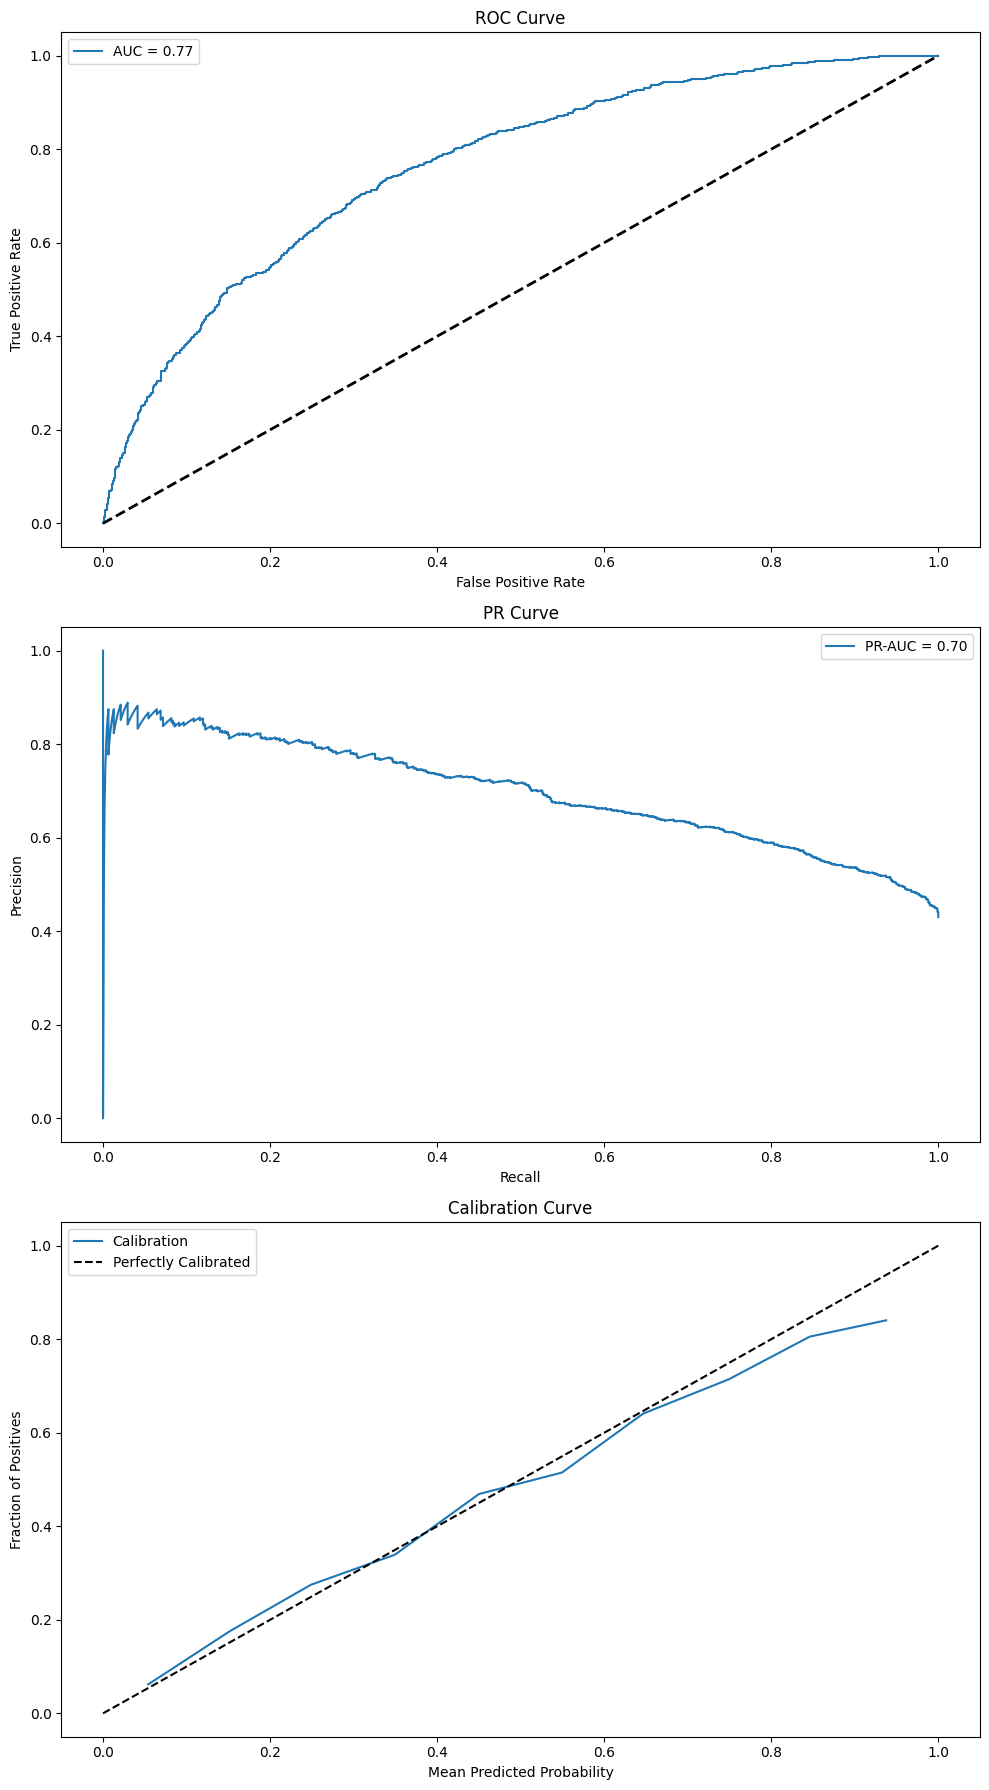

Specificity : 0.7650
Sensitivity : 0.6035
Accuracy : 0.6954
Precision : 0.6600
F1 score : 0.6305
Of 1438 people who did not have a prolonged LOS, 1100 (76.50%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 656 (60.35%) were correctly classified.
summary_consult_count_all
summary_first_rfd_status_No
viz_drg_Respiratory infections & inflammations w mcc
viz_disp_collapsed_Other
img_count_any
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_ed_arrival_time_Afternoon
viz_service_collapsed_Surgical Services
census_daily_ed_count
summary_last_rfd_status_No
viz_age
census_daily_inpt_count
summary_consult_count_unique_services
img_count_us
con_service_hospitalist_service_count
viz_ynhhs_sg2_service_Digestive Health - Medical
summary_first_rfd_day_Mon
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
con_service_gastroenterology_count
con_service_oncology_count
summary_last_edd_doc_time_Morning
summary_last_edd_doc_day_Mon
viz_admission_day_Fri

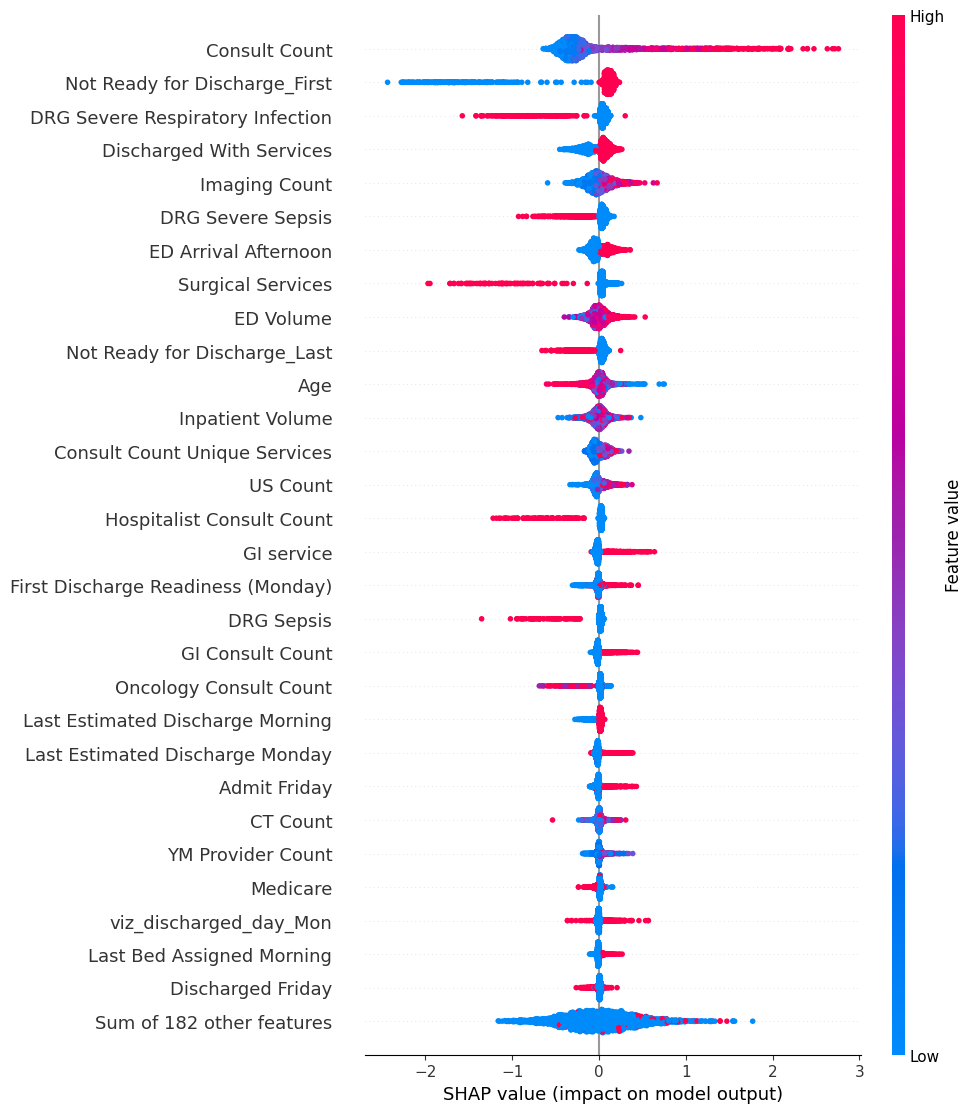

Plots for df_all_simple_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 885)
X train_preprocessed shape: (3814, 305)
X val preprocessed shape: (935, 305)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 205)
X_val_selected shape: (935, 205)
100%|██████████| 20/20 [00:10<00:00,  1.84trial/s, best loss: -0.7805076254092049]
XGB Best parameters for 205 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


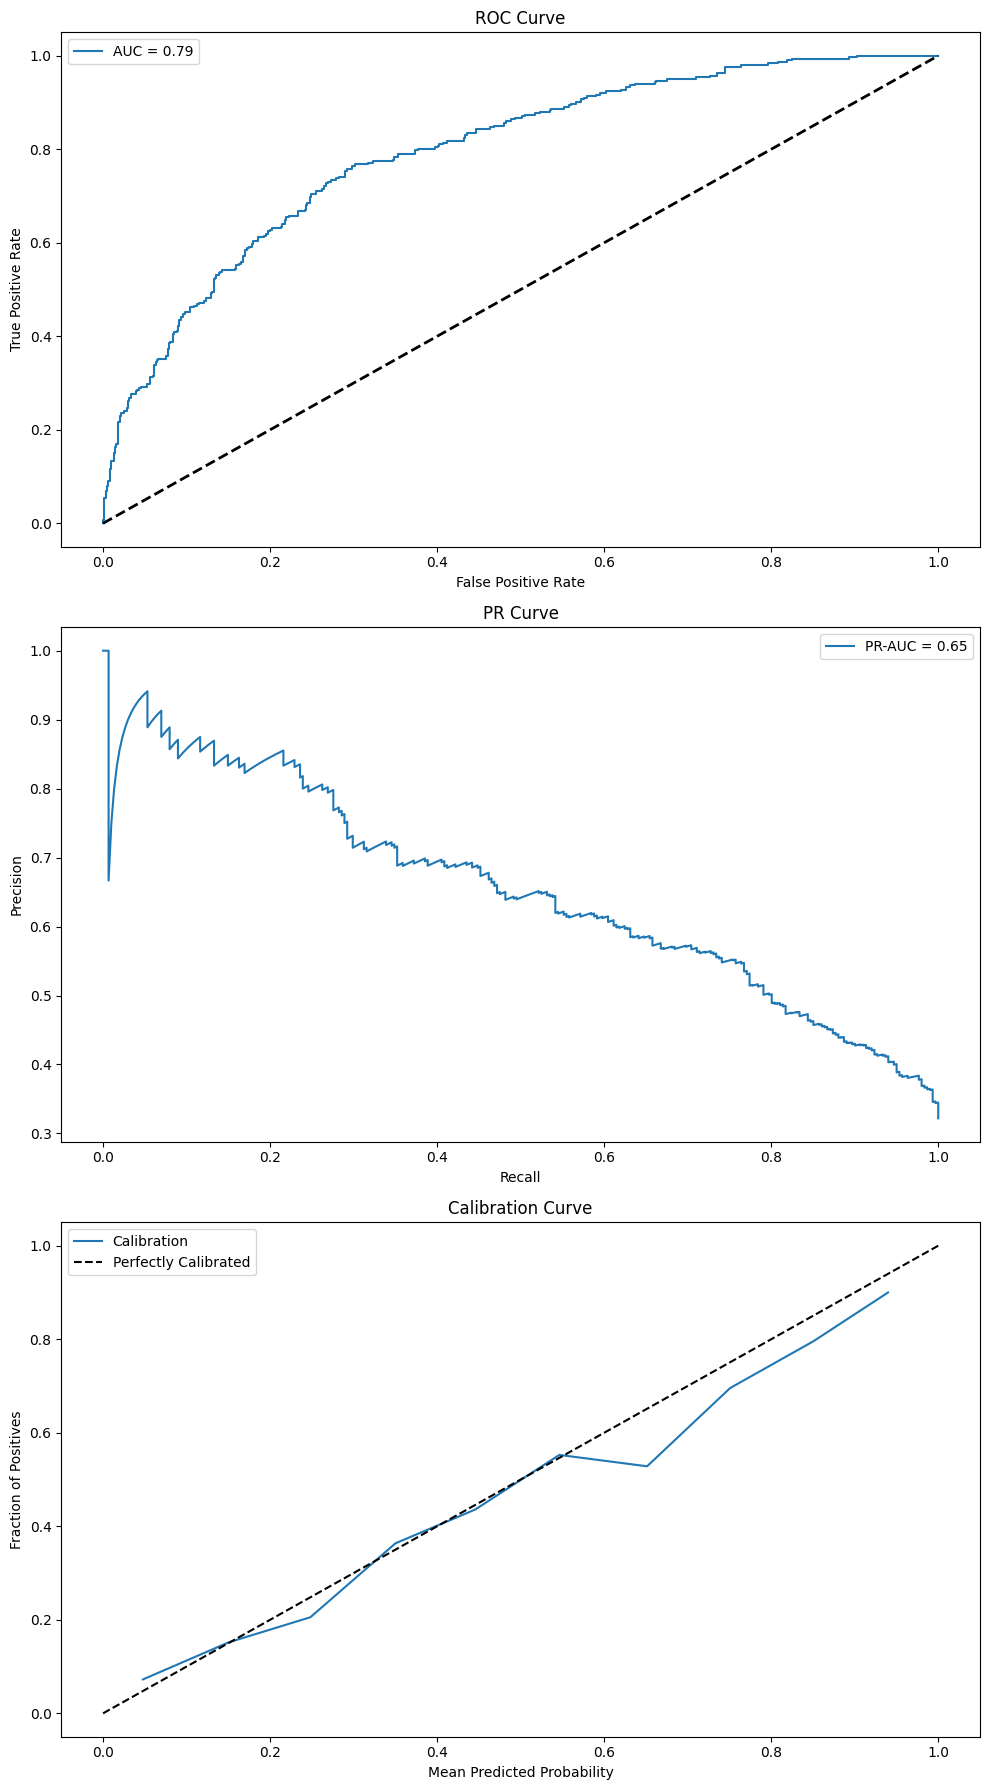

Specificity : 0.8675
Sensitivity : 0.5150
Accuracy : 0.7540
Precision : 0.6485
F1 score : 0.5741
Of 634 people who did not have a prolonged LOS, 550 (86.75%) were correctly classified.
Of 301 people who did have a prolonged LOS, 155 (51.50%) were correctly classified.
summary_first_rfd_status_No
summary_consult_count_all
viz_age
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_ed_arrival_time_Afternoon
img_count_any
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
census_daily_ed_count
census_daily_inpt_count
viz_admission_day_Fri
img_count_us
summary_first_edd_doc_day_Thu
summary_first_rfd_day_Mon
summary_last_rfd_status_No
con_service_radiology_count
viz_ynhhs_sg2_service_Digestive Health - Medical
viz_drg_Respiratory infections & inflammations w mcc
viz_discharged_day_Sun
summary_last_edd_doc_day_Mon
summary_last_edd_doc_day_Thu
viz_drg_Rare
viz_discharged_day_Fri
summary_last_edd_doc_time_Morning
thro_ed_arrival_time_Night
summary_first_edd_doc_day_Mon
su

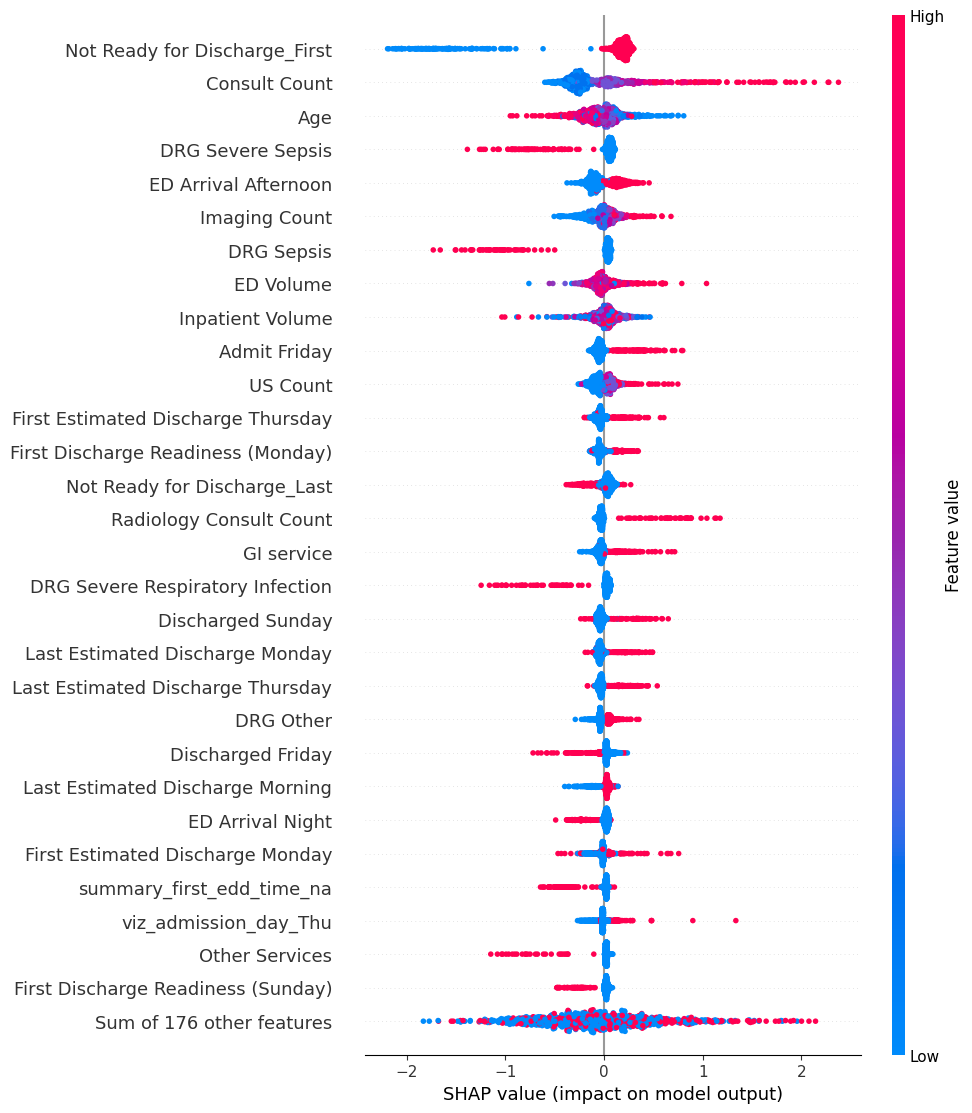

Plots for df_home_simple_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 885)
X train_preprocessed shape: (1091, 286)
X val preprocessed shape: (260, 286)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 176)
X_val_selected shape: (260, 176)
100%|██████████| 20/20 [00:07<00:00,  2.76trial/s, best loss: -0.6783778883454208]
XGB Best parameters for 176 features: {'colsample_by_tree': 0.9689612066730257, 'learning_rate': 0.24580725496486383, 'max_depth': 15, 'n_estimators': 24, 'num_leaves': 31, 'reg_lambda': 0.9983513763315744}


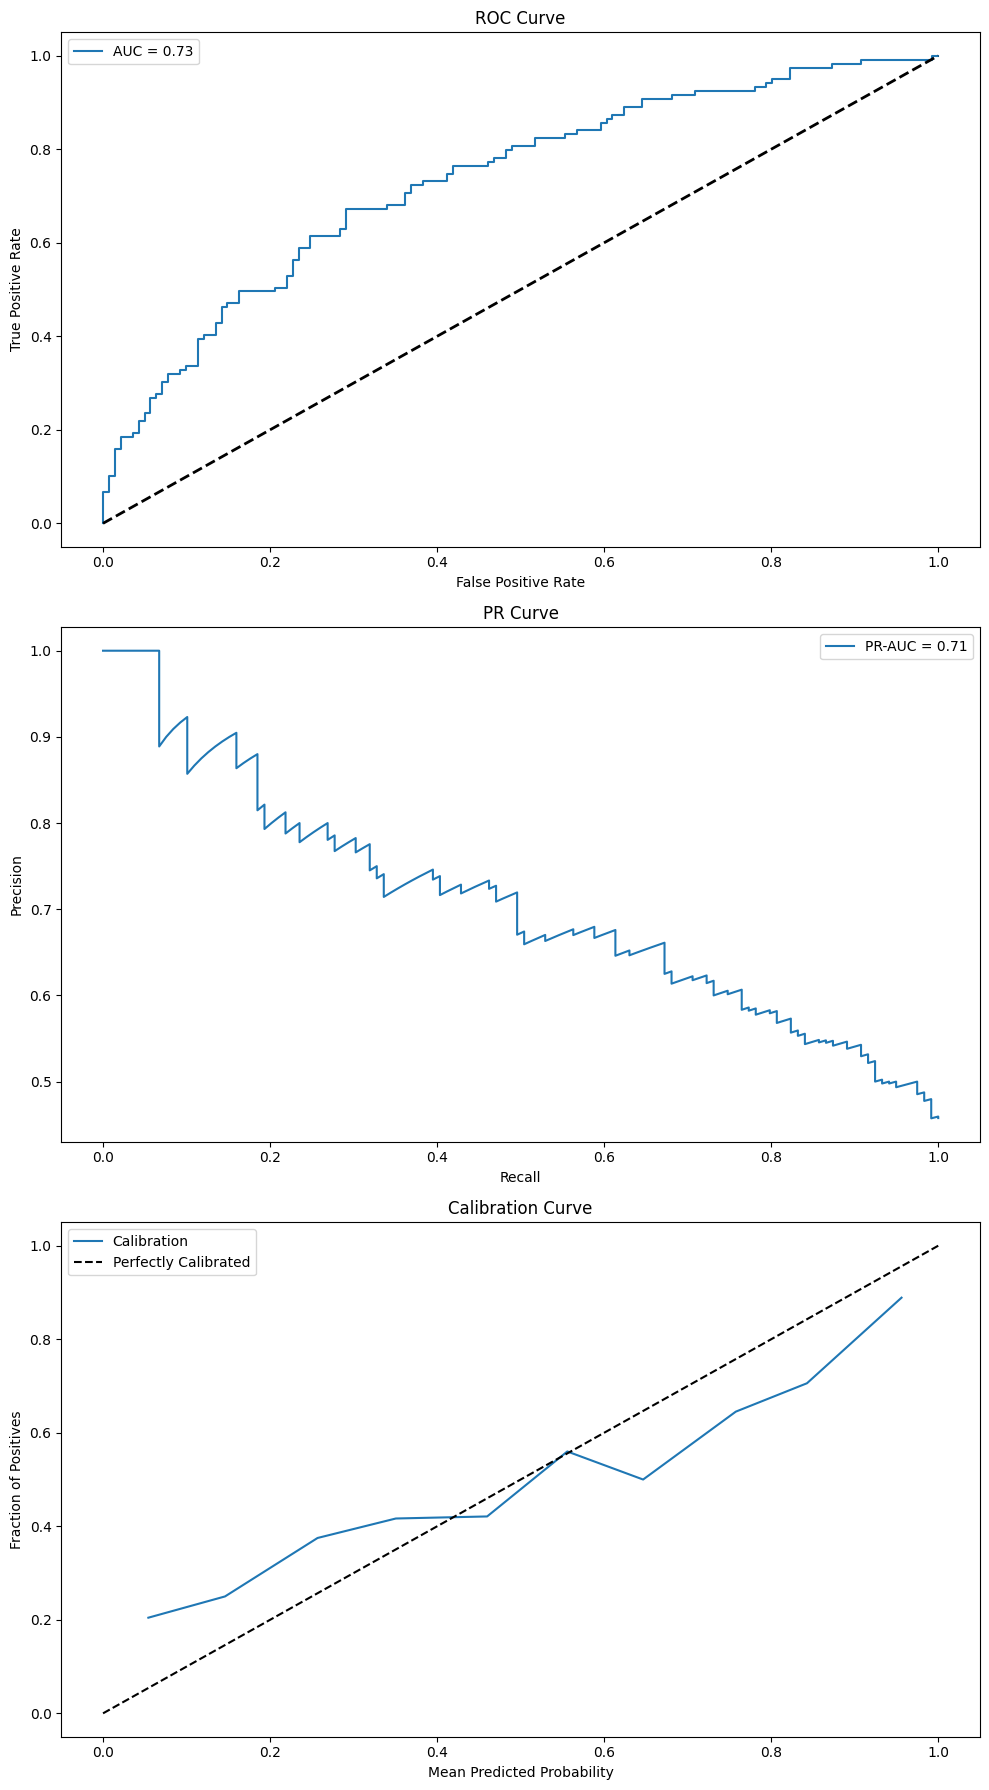

Specificity : 0.7163
Sensitivity : 0.6134
Accuracy : 0.6692
Precision : 0.6460
F1 score : 0.6293
Of 141 people who did not have a prolonged LOS, 101 (71.63%) were correctly classified.
Of 119 people who did have a prolonged LOS, 73 (61.34%) were correctly classified.
summary_first_rfd_status_No
img_count_any
summary_consult_count_all
con_signer_ym_provider_count
census_daily_inpt_count
thro_boarding_yn
viz_age
census_daily_ed_count
summary_consult_count_unique_services
img_count_us
viz_gender_Female
thro_ed_arrival_time_Afternoon
summary_first_rfd_day_Mon
thro_first_bed_assigned_time_Afternoon
con_max_consult_note_creation_time_Morning
summary_first_edd_day_Wed
viz_disp_collapsed_Other
thro_first_bed_assigned_time_Night
summary_first_rfd_status_Yes, no barriers
thro_ed_arrival_time_Night
con_service_cardiology_count
thro_first_bed_assigned_day_Sun
summary_first_edd_day_Mon
con_max_consult_note_creation_day_Mon
summary_last_rfd_status_Yes, no barriers
thro_ed_arrival_day_Sun
img_count_c

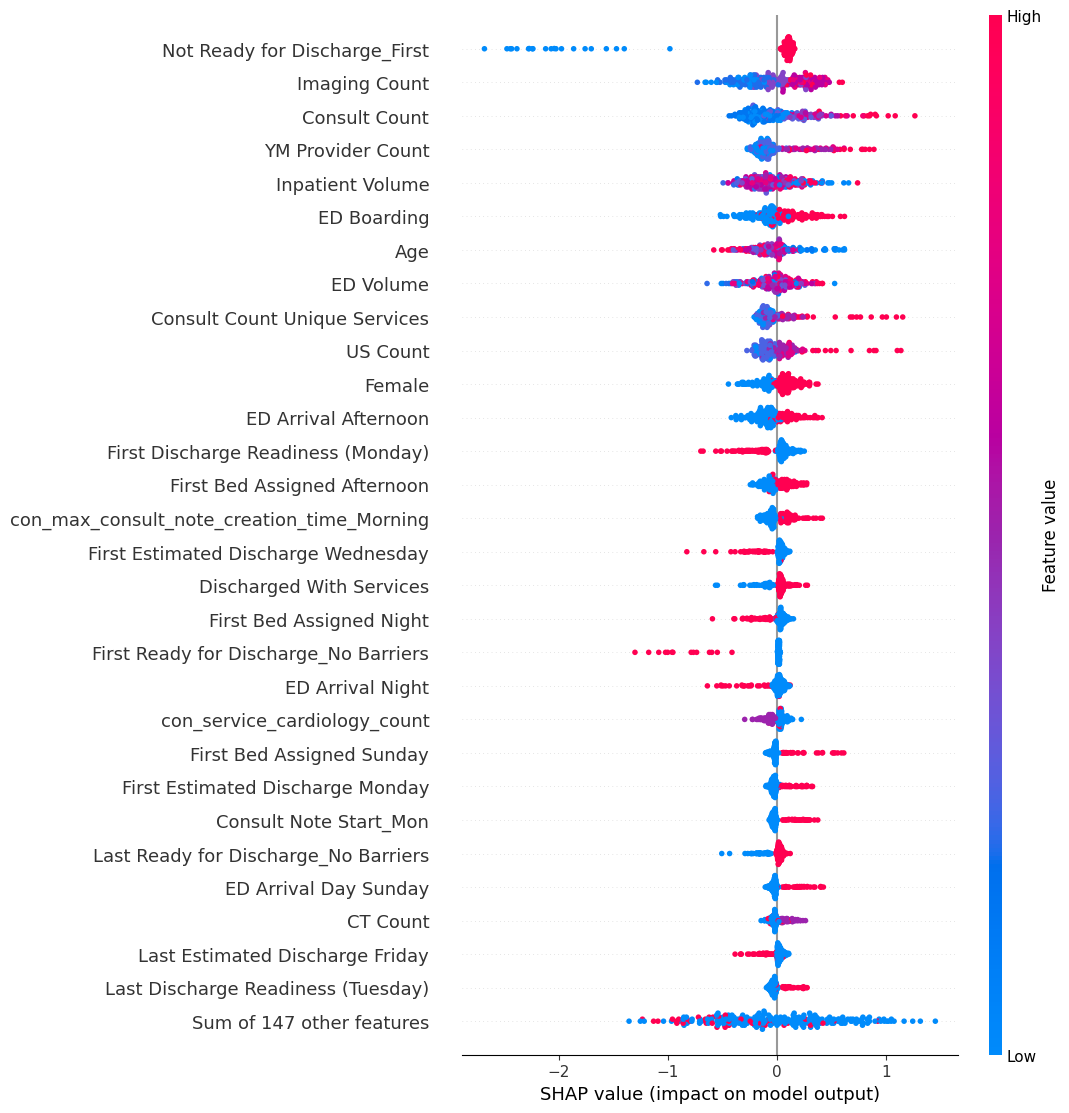

Plots for df_hf_simple_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [5]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_simple, output_folder, df_name, suffix="simple")

### With Quintiles

Running on df_all
df_filt shape: (12771, 885)
X train_preprocessed shape: (10246, 577)
X val preprocessed shape: (2525, 577)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 298)
X_val_selected shape: (2525, 298)
100%|██████████| 20/20 [00:22<00:00,  1.12s/trial, best loss: -0.7908781063231825]
XGB Best parameters for 298 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


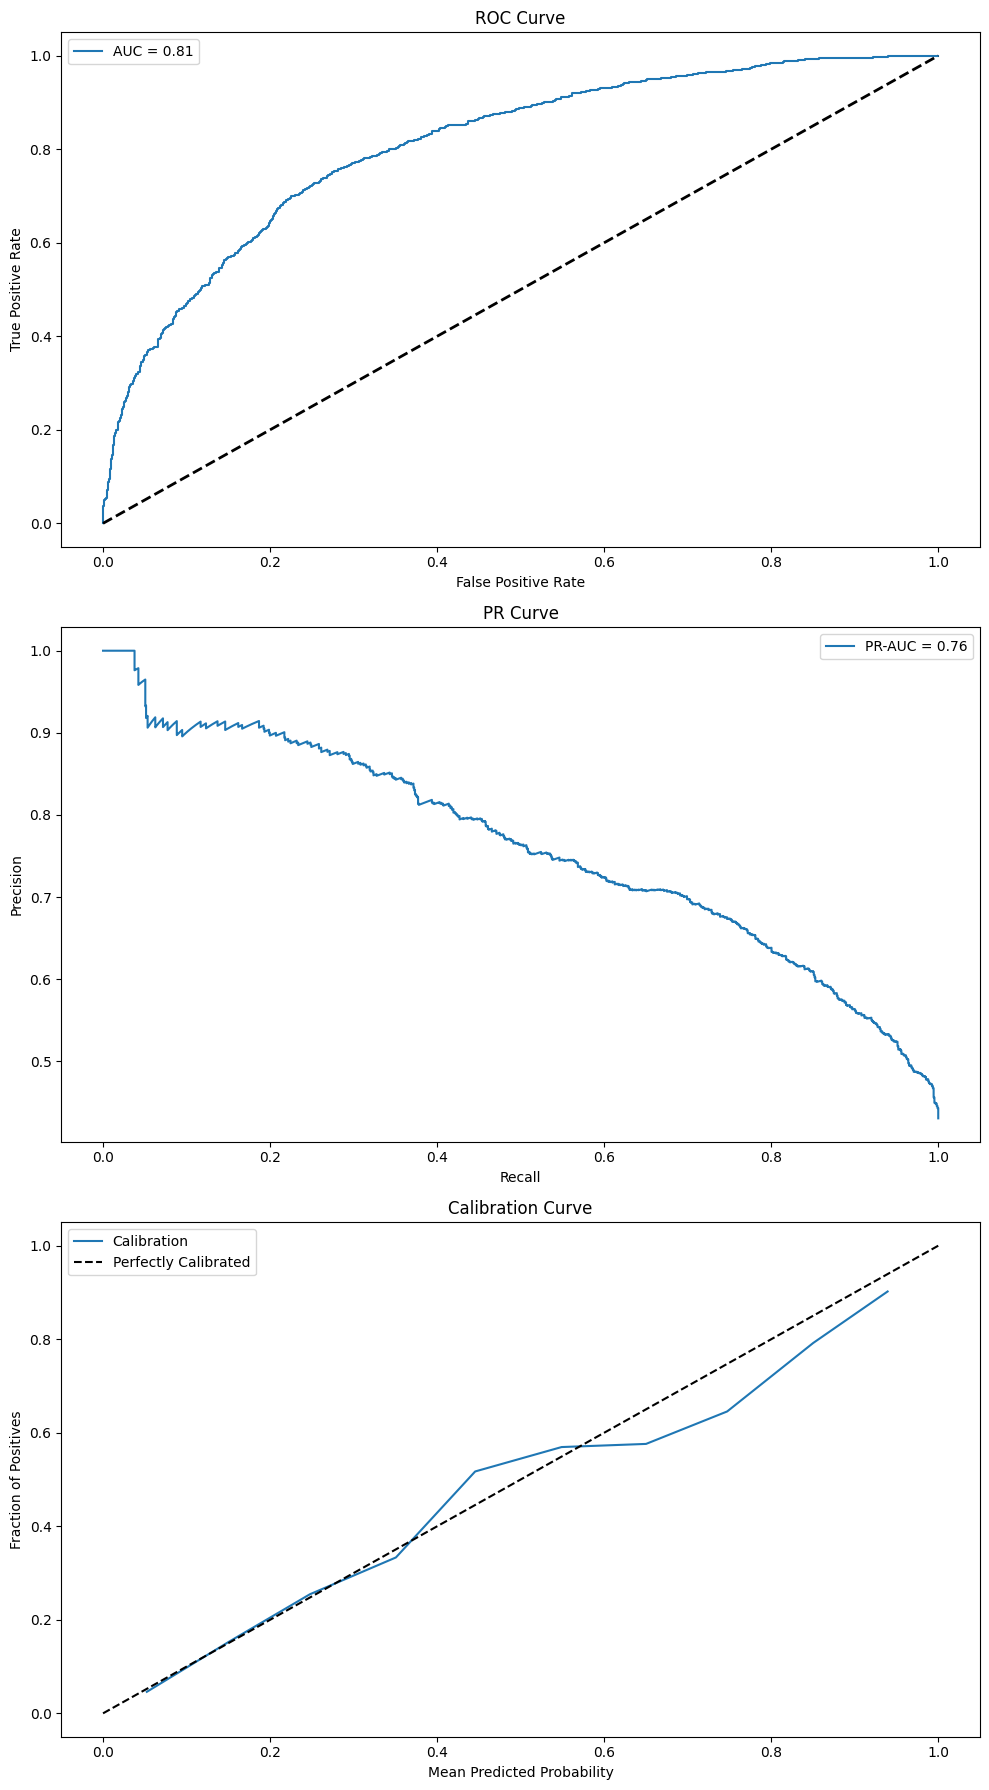

Specificity : 0.8067
Sensitivity : 0.6293
Accuracy : 0.7303
Precision : 0.7110
F1 score : 0.6676
Of 1438 people who did not have a prolonged LOS, 1160 (80.67%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 684 (62.93%) were correctly classified.
con_max_admit_order_to_consult_order_any_quintile
con_avg_admit_order_to_consult_completion_any_quintile
img_avg_admit_order_to_imaging_order_any_quintile
summary_first_rfd_status_No
summary_consult_count_all
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_service_collapsed_Surgical Services
viz_age
thro_ed_arrival_time_Afternoon
viz_disp_collapsed_Other
viz_ynhhs_sg2_service_Digestive Health - Medical
img_max_admit_order_to_imaging_order_us_quintile
con_max_consult_order_to_sign_any_quintile
summary_last_rfd_status_No
img_max_order_to_completion_any_quintile
census_daily_ed_count
census_daily_inpt_count
img_avg_admit_order_to_imaging_read_any_quintile

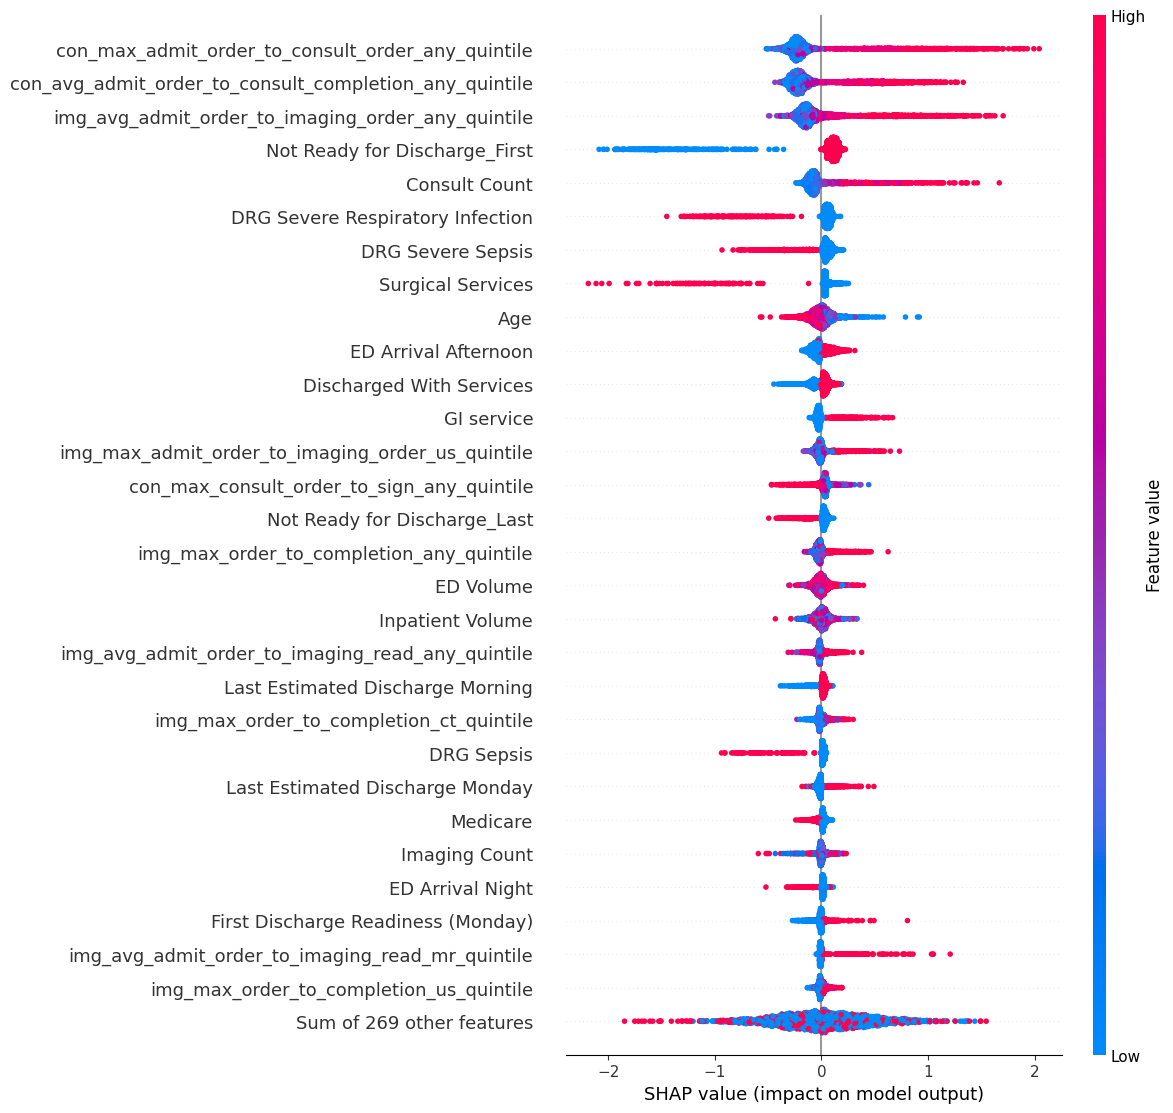

Plots for df_all_with_quintiles_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 885)
X train_preprocessed shape: (3814, 531)
X val preprocessed shape: (935, 531)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 280)
X_val_selected shape: (935, 280)
100%|██████████| 20/20 [00:13<00:00,  1.47trial/s, best loss: -0.8150951824431705]
XGB Best parameters for 280 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


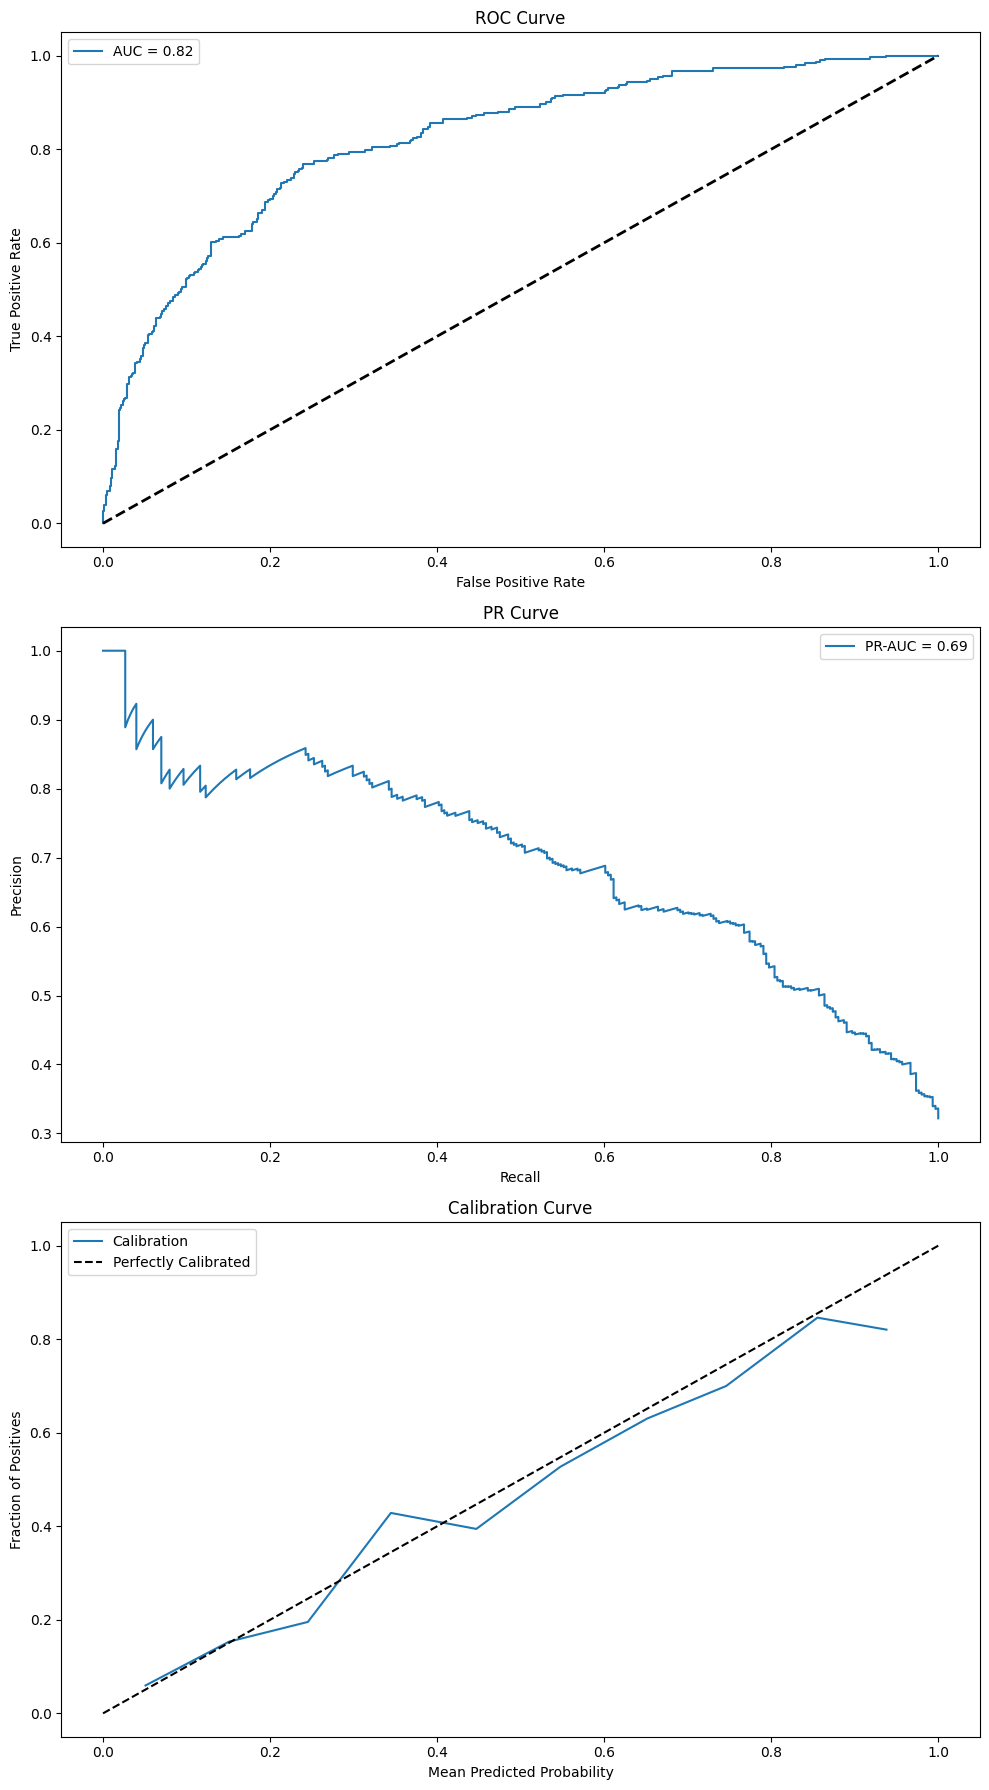

Specificity : 0.8896
Sensitivity : 0.5382
Accuracy : 0.7765
Precision : 0.6983
F1 score : 0.6079
Of 634 people who did not have a prolonged LOS, 564 (88.96%) were correctly classified.
Of 301 people who did have a prolonged LOS, 162 (53.82%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile
summary_first_rfd_status_No
con_max_admit_order_to_consult_order_any_quintile
summary_consult_count_all
viz_age
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
con_avg_admit_order_to_consult_completion_any_quintile
viz_ynhhs_sg2_service_Infectious Disease - Medical
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
thro_ed_arrival_time_Afternoon
summary_first_edd_doc_day_Mon
thro_ed_arrival_time_Night
viz_ynhhs_sg2_service_Digestive Health - Medical
img_avg_admit_order_to_imaging_read_any_quintile
census_daily_ed_count
census_daily_inpt_count
viz_drg_Cellulitis w/o mcc
img_max_order_to_completion_any_quintile
summary_first_rfd_day_Mon
viz_drg_Rare
viz_

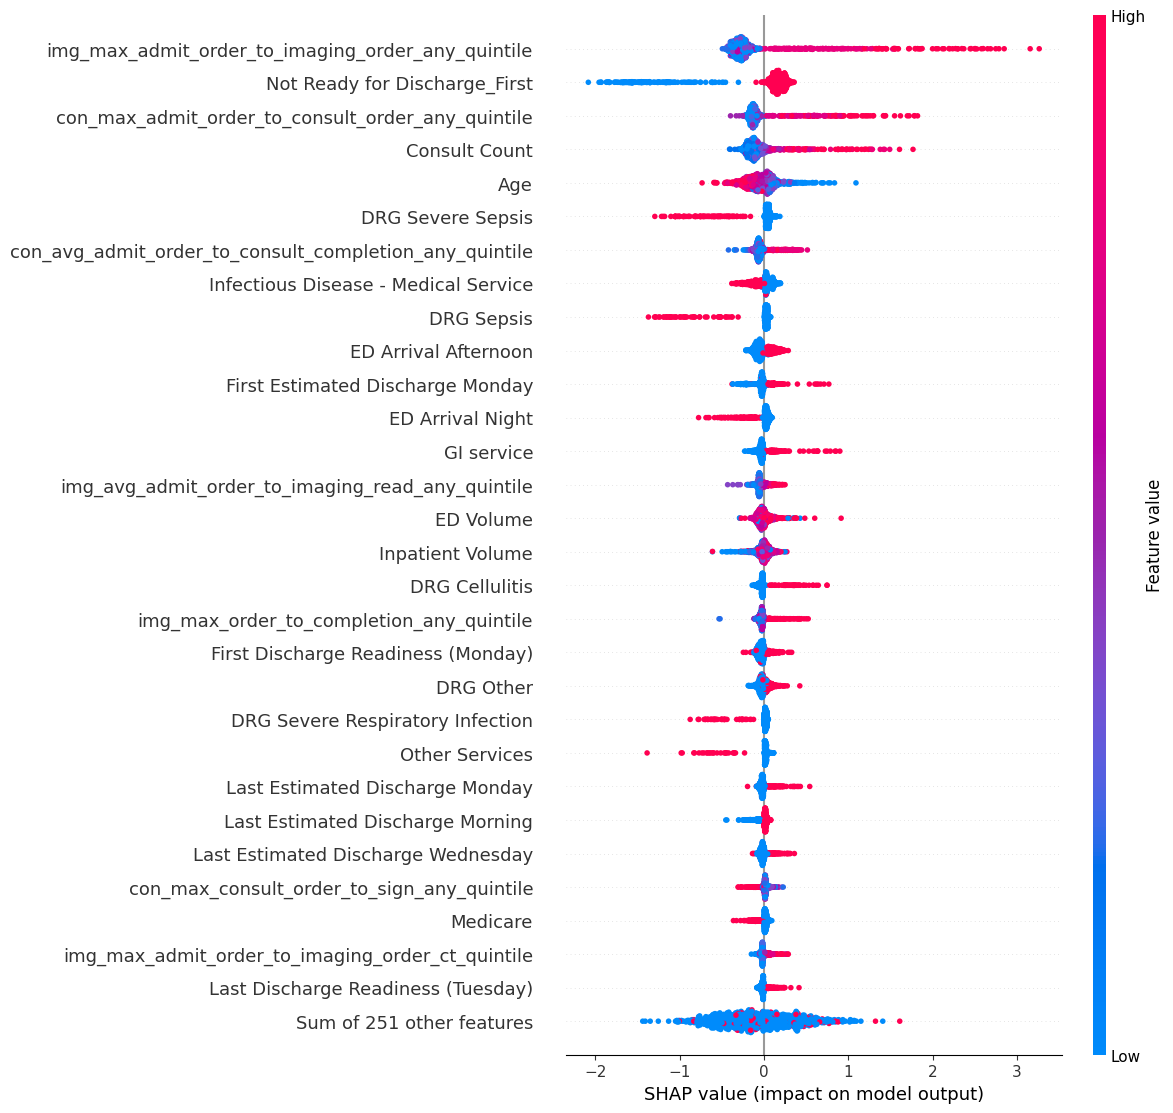

Plots for df_home_with_quintiles_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 885)
X train_preprocessed shape: (1091, 500)
X val preprocessed shape: (260, 500)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 246)
X_val_selected shape: (260, 246)
100%|██████████| 20/20 [00:09<00:00,  2.17trial/s, best loss: -0.7429177208073312]
XGB Best parameters for 246 features: {'colsample_by_tree': 0.8099656297384077, 'learning_rate': 0.17383589279439982, 'max_depth': 7, 'n_estimators': 20, 'num_leaves': 8, 'reg_lambda': 0.48490437823738375}


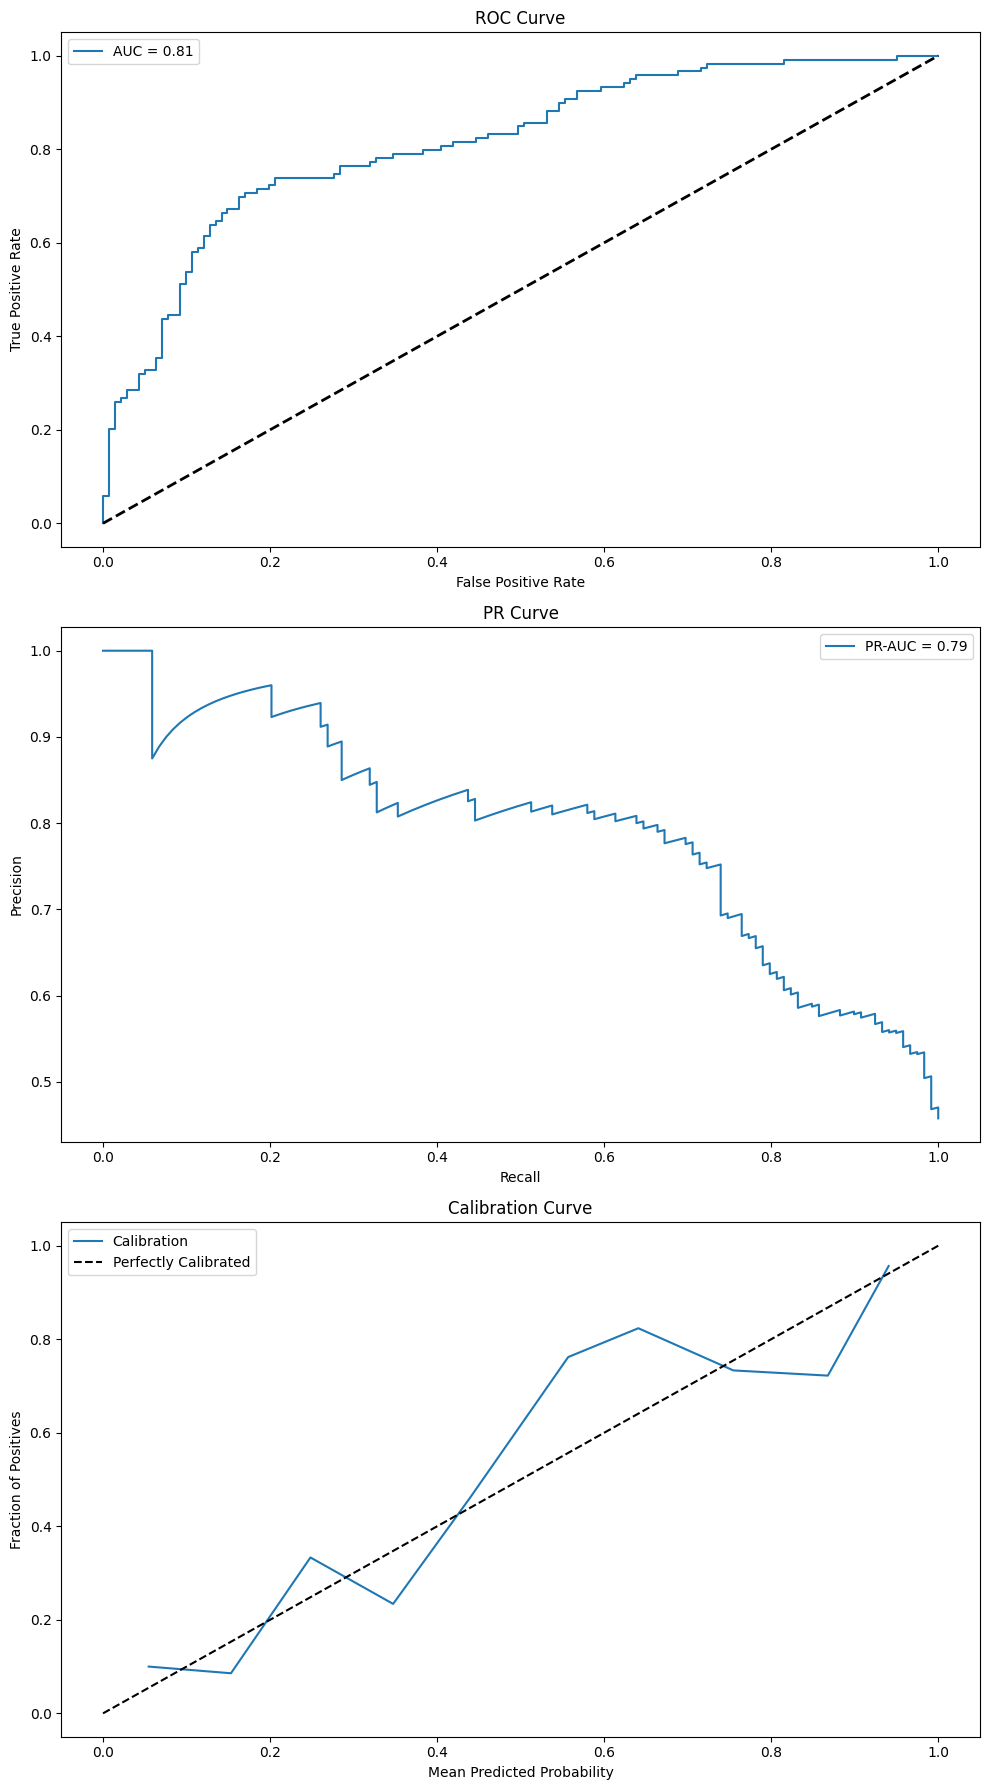

Specificity : 0.8723
Sensitivity : 0.6387
Accuracy : 0.7654
Precision : 0.8085
F1 score : 0.7136
Of 141 people who did not have a prolonged LOS, 123 (87.23%) were correctly classified.
Of 119 people who did have a prolonged LOS, 76 (63.87%) were correctly classified.
con_max_admit_order_to_consult_order_any_quintile
img_max_admit_order_to_imaging_order_any_quintile
img_max_admit_order_to_imaging_read_any_quintile
summary_first_rfd_status_No
census_daily_ed_count
summary_first_rfd_status_Yes, no barriers
img_max_order_to_completion_any_quintile
viz_discharged_day_Tue
viz_age
thro_ed_arrival_time_Afternoon
con_max_admit_order_to_consult_completion_any_quintile
summary_last_rfd_status_No
census_daily_inpt_count
con_signer_ym_provider_count
viz_admission_day_Mon
viz_gender_Female
summary_first_rfd_day_Tue
thro_first_bed_assigned_time_Night
summary_last_edd_doc_day_Mon
summary_first_rfd_day_Mon
thro_ed_arrival_time_Night
con_max_consult_note_creation_day_Thu
con_avg_admit_order_to_consult_c

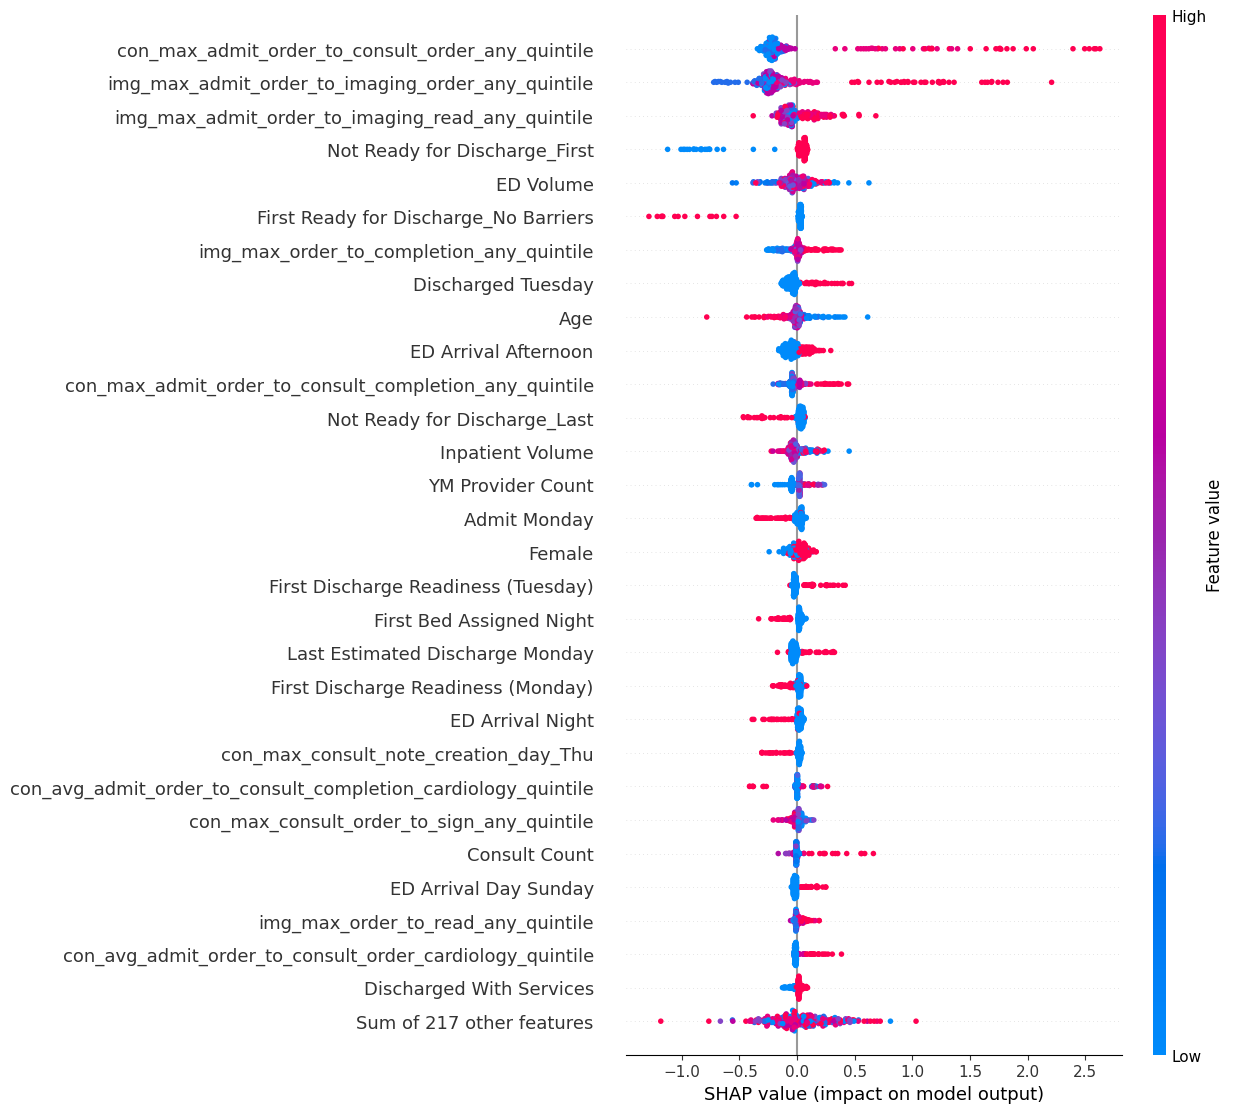

Plots for df_hf_with_quintiles_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [6]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_complex, output_folder, df_name, suffix="with_quintiles")

### With Continuous Features

Running on df_all
df_filt shape: (12771, 885)
X train_preprocessed shape: (10246, 778)
X val preprocessed shape: (2525, 778)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 329)
X_val_selected shape: (2525, 329)
100%|██████████| 20/20 [00:51<00:00,  2.59s/trial, best loss: -0.8862437138420038]
XGB Best parameters for 329 features: {'colsample_by_tree': 0.8099656297384077, 'learning_rate': 0.17383589279439982, 'max_depth': 7, 'n_estimators': 20, 'num_leaves': 8, 'reg_lambda': 0.48490437823738375}


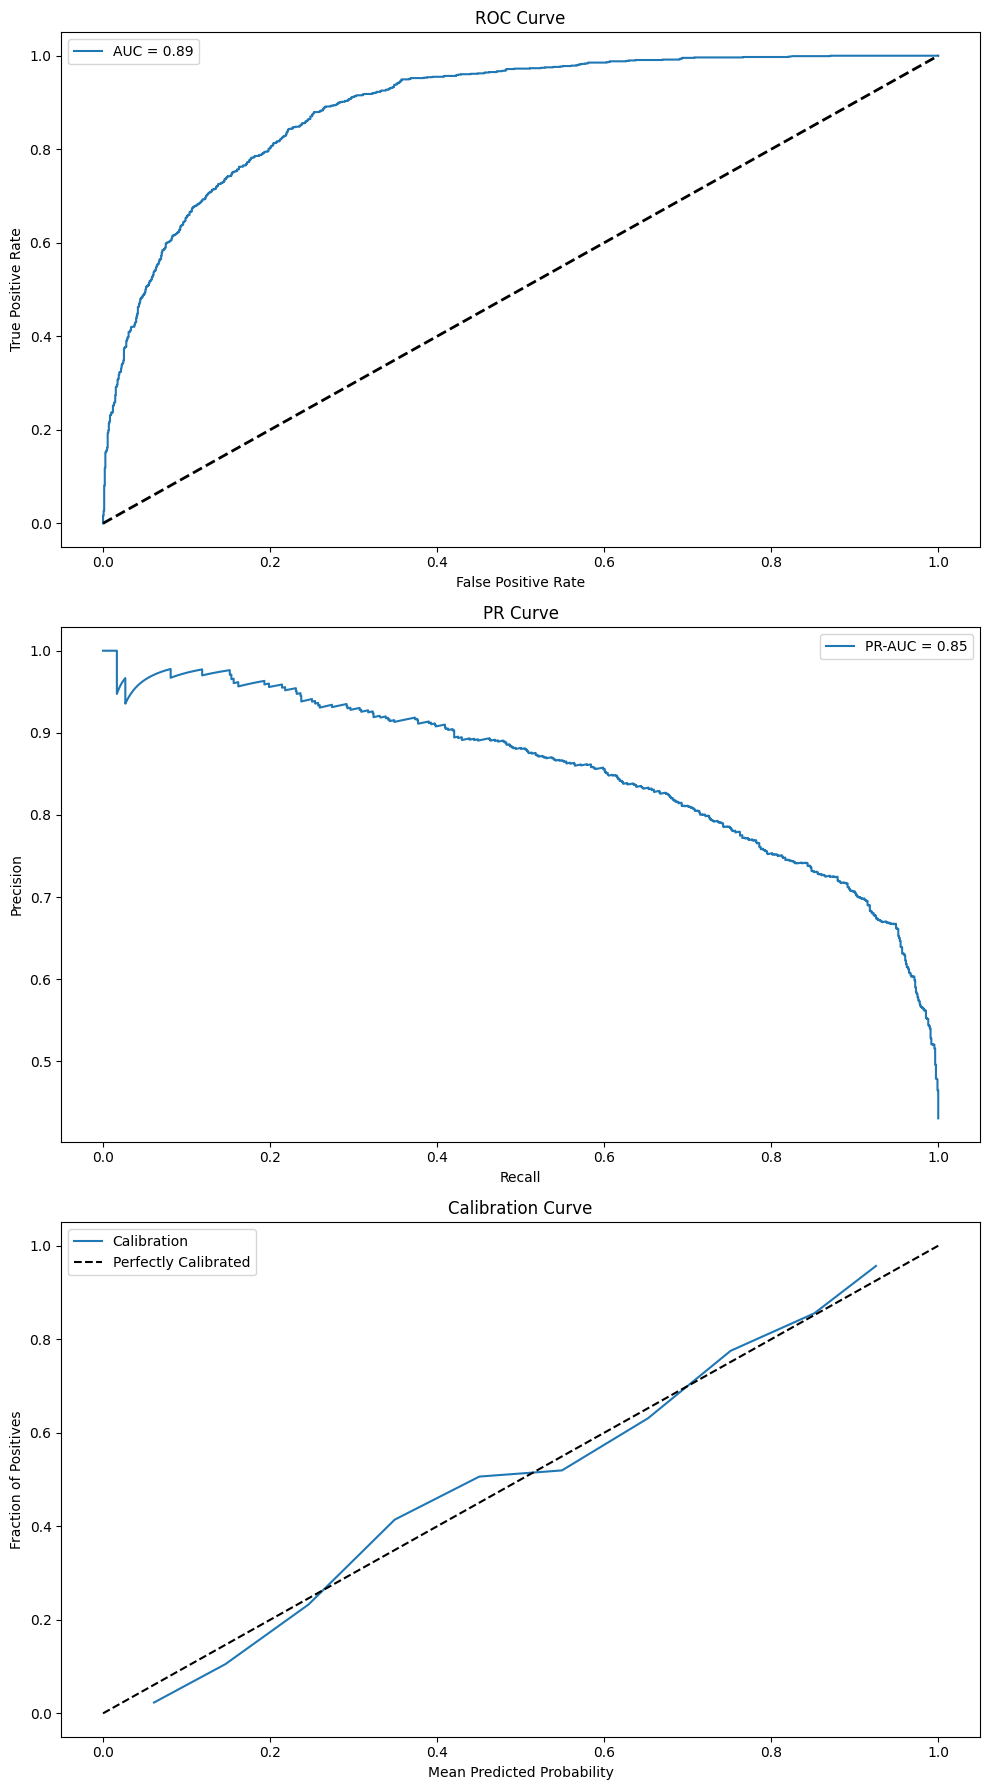

Specificity : 0.8255
Sensitivity : 0.7737
Accuracy : 0.8032
Precision : 0.7701
F1 score : 0.7719
Of 1438 people who did not have a prolonged LOS, 1187 (82.55%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 841 (77.37%) were correctly classified.
summary_total_hrs_nmr
summary_total_hrs_mrwb
summary_total_hrs_mrnb
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Rare
thro_admit_order_to_ed_dept_hrs
icu_any_icu_yn
viz_age
viz_service_collapsed_Surgical Services
viz_disp_collapsed_Other
thro_ed_arrival_time_Afternoon
thro_door_to_admit_order_hrs
con_max_admit_order_to_consult_order_any_hrs
viz_drg_Esophagitis, gastroent & misc digest disorders w/o mcc
viz_ynhhs_sg2_service_Digestive Health - Medical
img_avg_admit_order_to_imaging_order_any_hrs
summary_first_rfd_day_Mon
viz_service_collapsed_Medicine
viz_drg_Cellulitis w/o mcc
con_avg_admit_order_to_consult_completion_any_hrs
thro_last_bed_assig

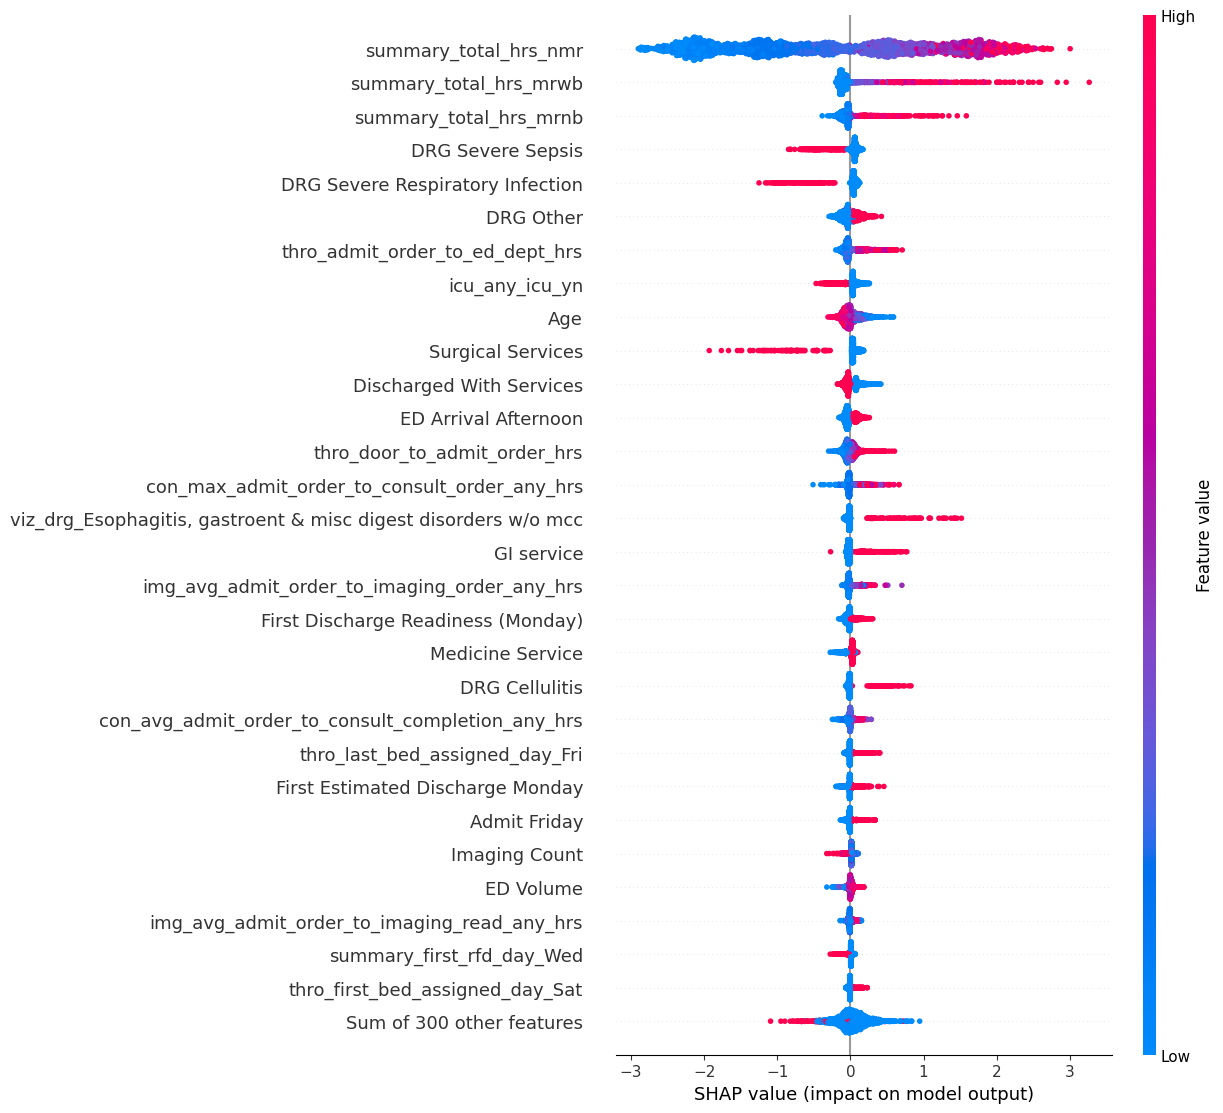

Plots for df_all_continuous_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 885)
X train_preprocessed shape: (3814, 699)
X val preprocessed shape: (935, 699)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 299)
X_val_selected shape: (935, 299)
100%|██████████| 20/20 [00:24<00:00,  1.24s/trial, best loss: -0.8957787425652398]
XGB Best parameters for 299 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


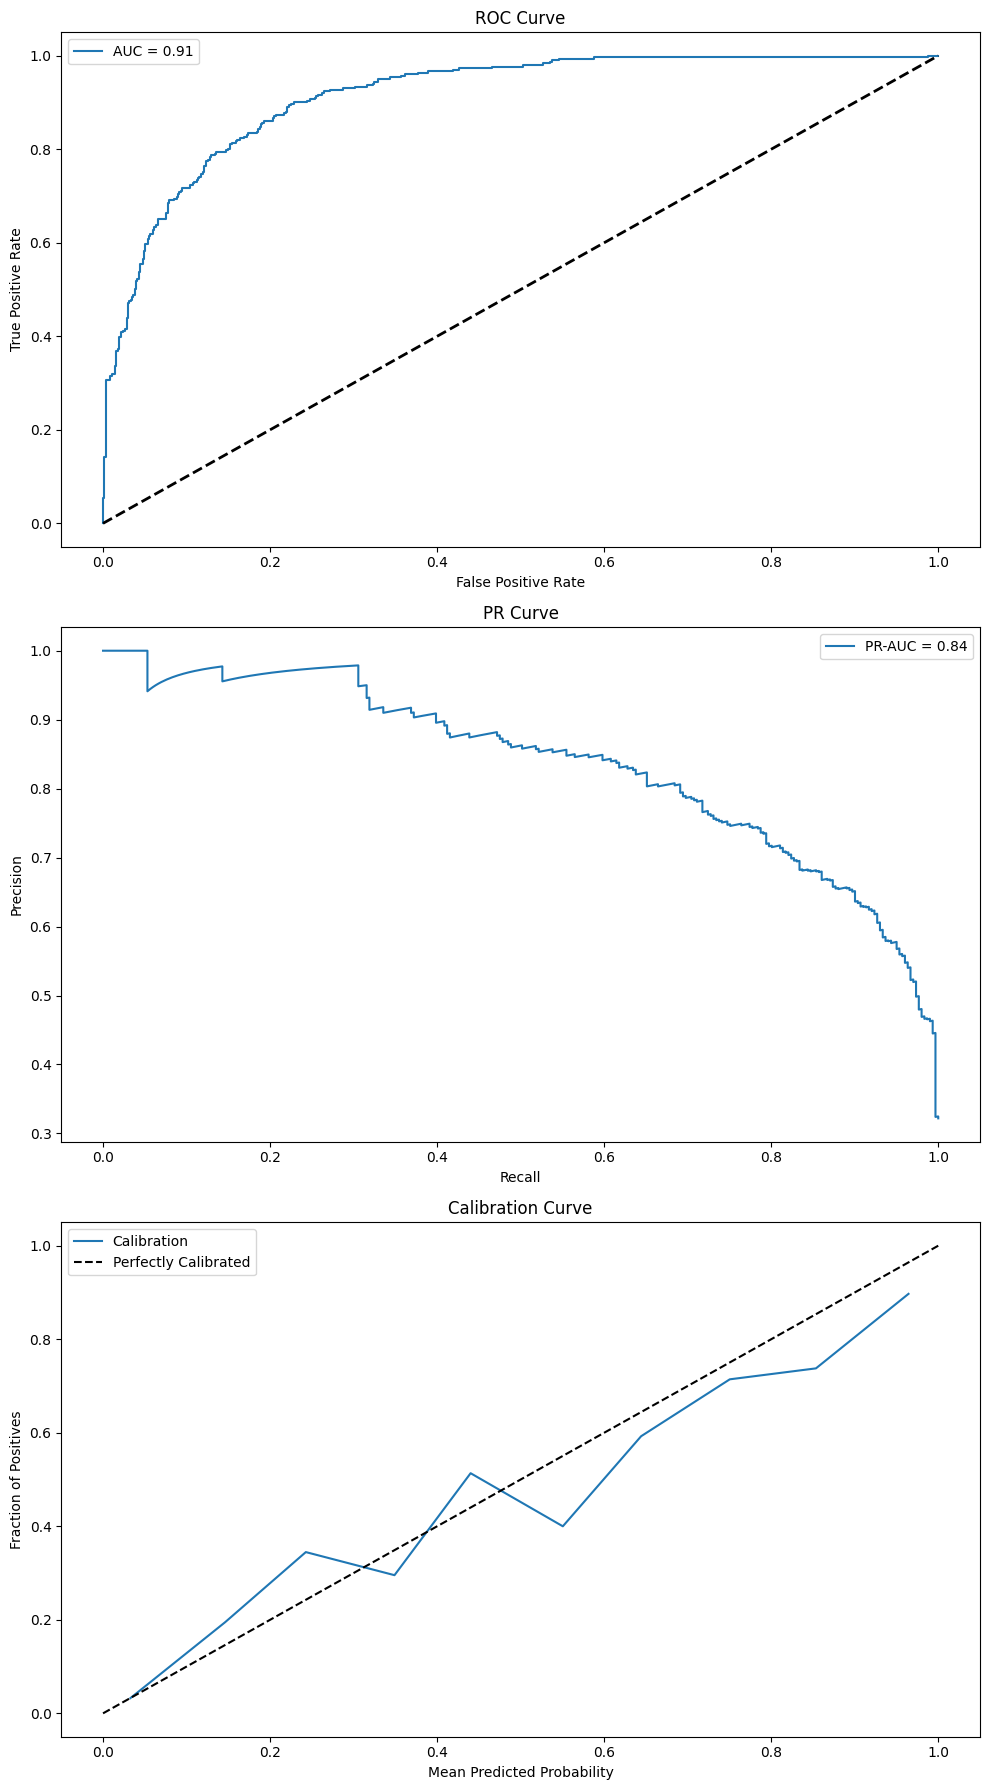

Specificity : 0.8912
Sensitivity : 0.7309
Accuracy : 0.8396
Precision : 0.7612
F1 score : 0.7458
Of 634 people who did not have a prolonged LOS, 565 (89.12%) were correctly classified.
Of 301 people who did have a prolonged LOS, 220 (73.09%) were correctly classified.
summary_total_hrs_nmr
summary_total_hrs_mrnb
summary_first_rfd_day_Mon
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_door_to_admit_order_hrs
viz_age
thro_admit_order_to_ed_dept_hrs
img_avg_admit_order_to_imaging_order_any_hrs
thro_ed_arrival_time_Afternoon
viz_drg_Rare
viz_drg_Esophagitis, gastroent & misc digest disorders w/o mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
viz_drg_Respiratory infections & inflammations w mcc
census_daily_ed_count
summary_total_hrs_mrwb
viz_drg_Cellulitis w/o mcc
img_max_order_to_read_any_hrs
con_max_admit_order_to_consult_order_any_hrs
census_daily_inpt_count
thro_admit_order_to_first_bed_hrs
thro_ed_departure_time_Afternoon
viz_ynhhs_sg2_service_Cardio

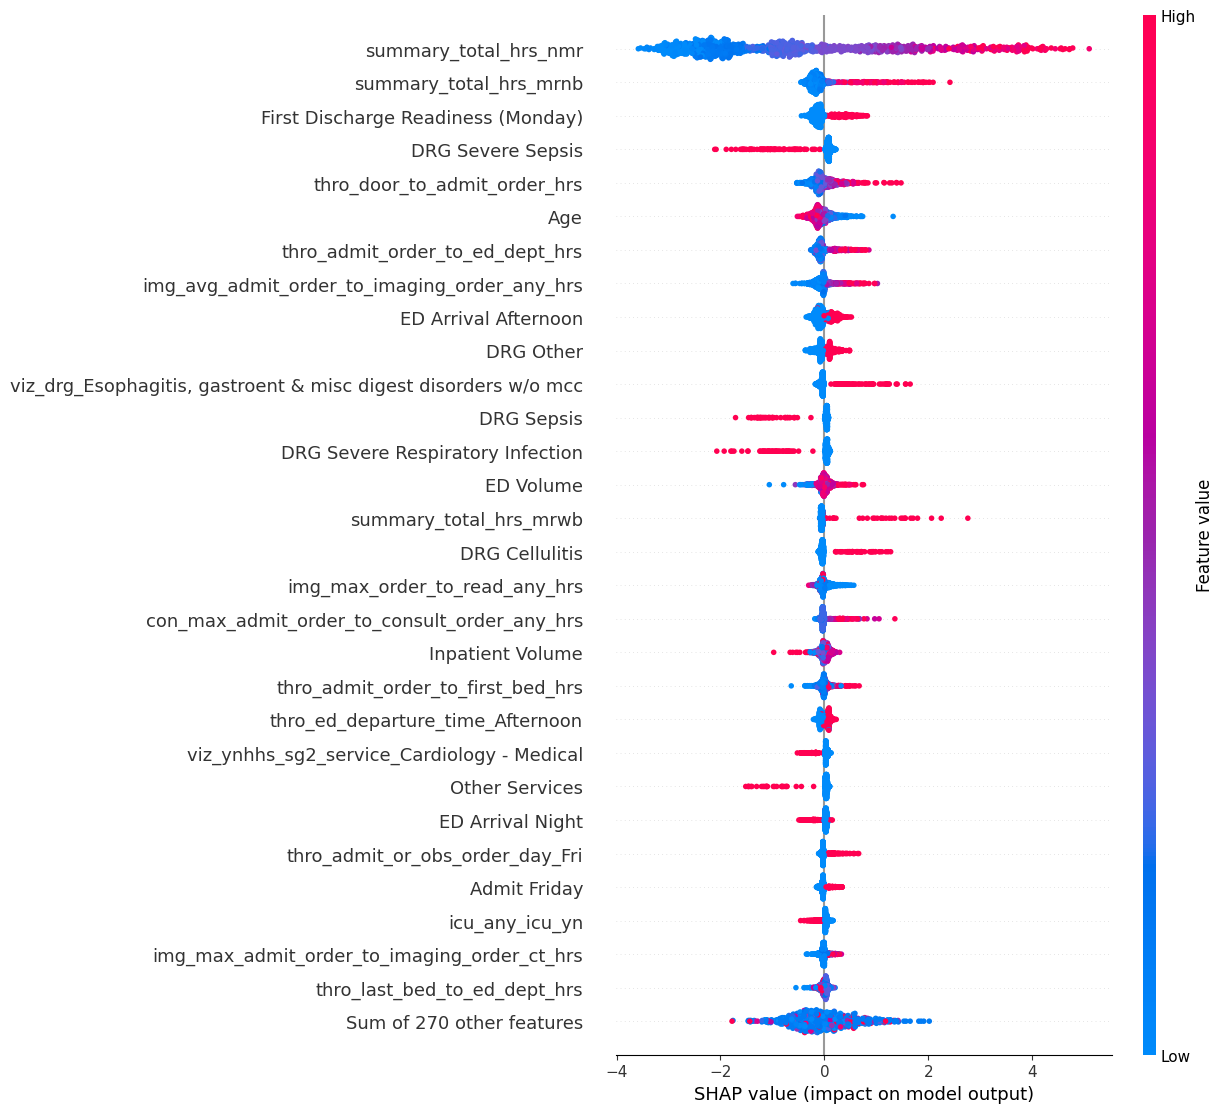

Plots for df_home_continuous_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 885)
X train_preprocessed shape: (1091, 655)
X val preprocessed shape: (260, 655)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 260)
X_val_selected shape: (260, 260)
100%|██████████| 20/20 [00:12<00:00,  1.57trial/s, best loss: -0.8774201664136729]
XGB Best parameters for 260 features: {'colsample_by_tree': 0.9689612066730257, 'learning_rate': 0.24580725496486383, 'max_depth': 15, 'n_estimators': 24, 'num_leaves': 31, 'reg_lambda': 0.9983513763315744}


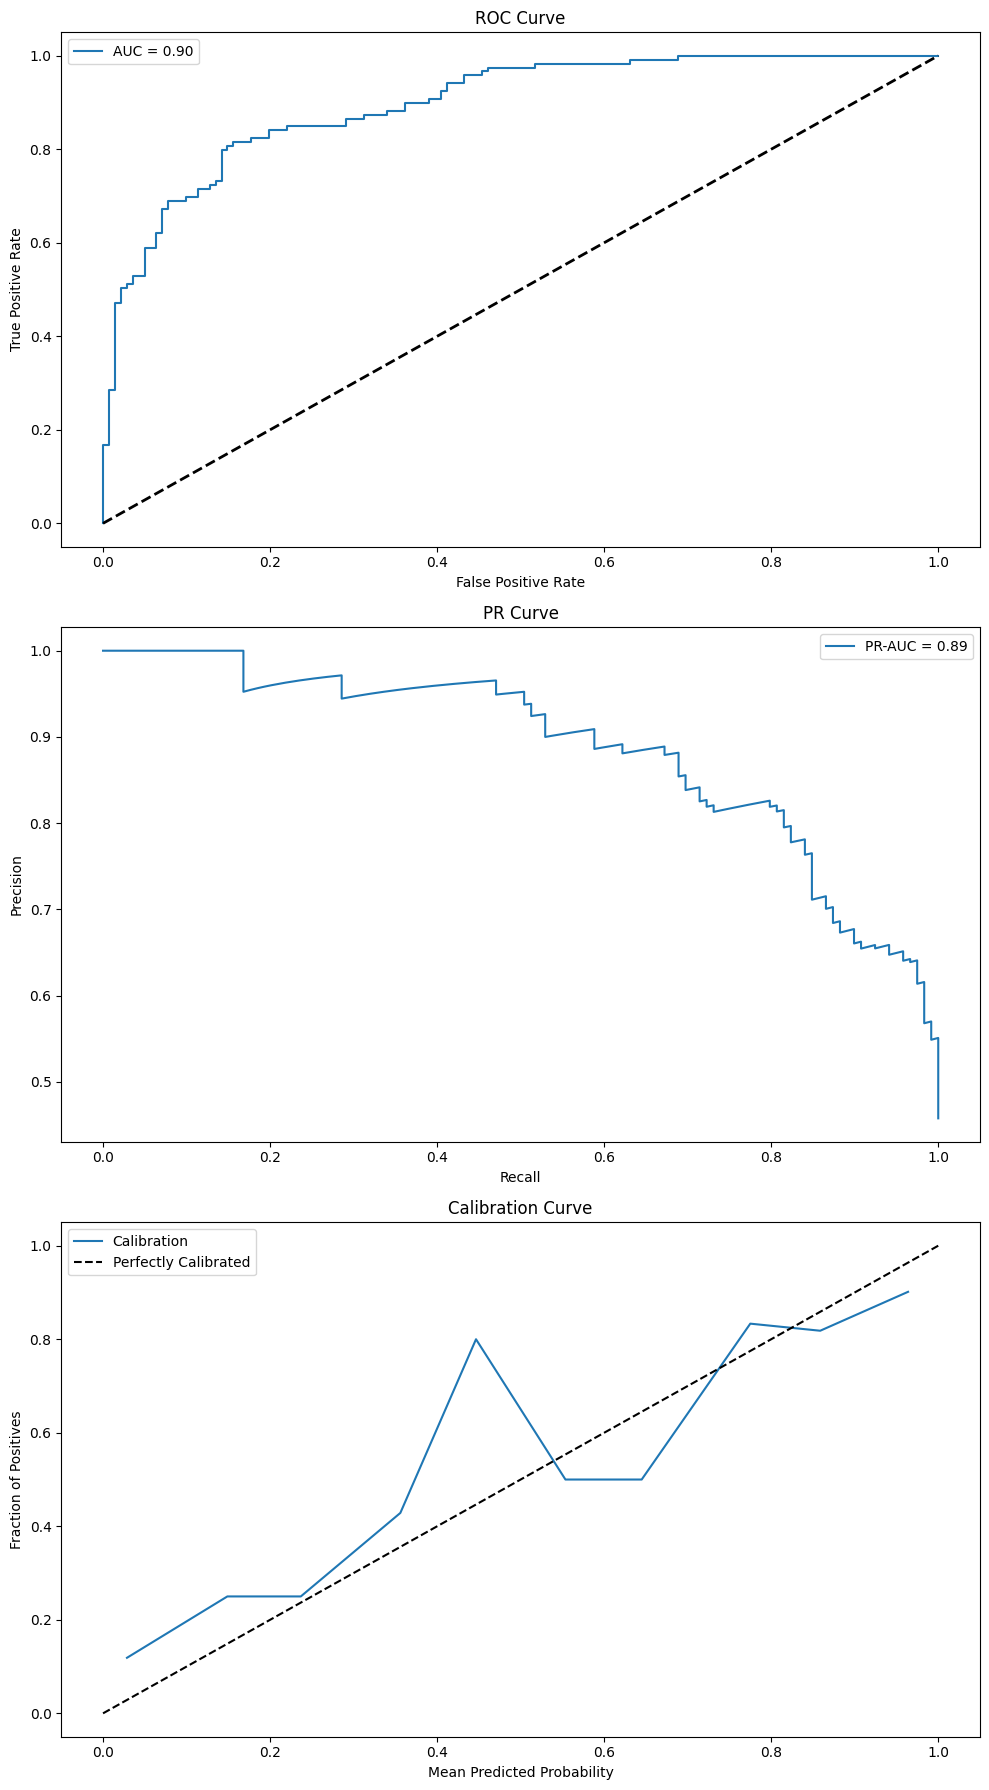

Specificity : 0.8652
Sensitivity : 0.7311
Accuracy : 0.8038
Precision : 0.8208
F1 score : 0.7733
Of 141 people who did not have a prolonged LOS, 122 (86.52%) were correctly classified.
Of 119 people who did have a prolonged LOS, 87 (73.11%) were correctly classified.
summary_total_hrs_nmr
thro_door_to_admit_order_hrs
summary_total_hrs_mrnb
img_max_admit_order_to_imaging_read_any_hrs
thro_last_bed_to_ed_dept_hrs
img_max_admit_order_to_imaging_order_us_hrs
thro_admit_order_to_ed_dept_hrs
viz_age
summary_total_hrs_mrwb
img_avg_admit_order_to_imaging_order_any_hrs
con_max_consult_order_to_sign_any_hrs
img_avg_admit_order_to_imaging_read_us_hrs
con_avg_admit_order_to_consult_order_any_hrs
viz_disp_collapsed_Other
thro_admit_order_to_first_bed_hrs
img_avg_admit_order_to_imaging_read_ct_hrs
img_max_order_to_completion_ct_hrs
census_daily_ed_count
con_max_consult_order_to_note_any_hrs
con_avg_admit_order_to_consult_completion_any_hrs
thro_first_bed_assigned_day_Fri
summary_consult_count_all
co

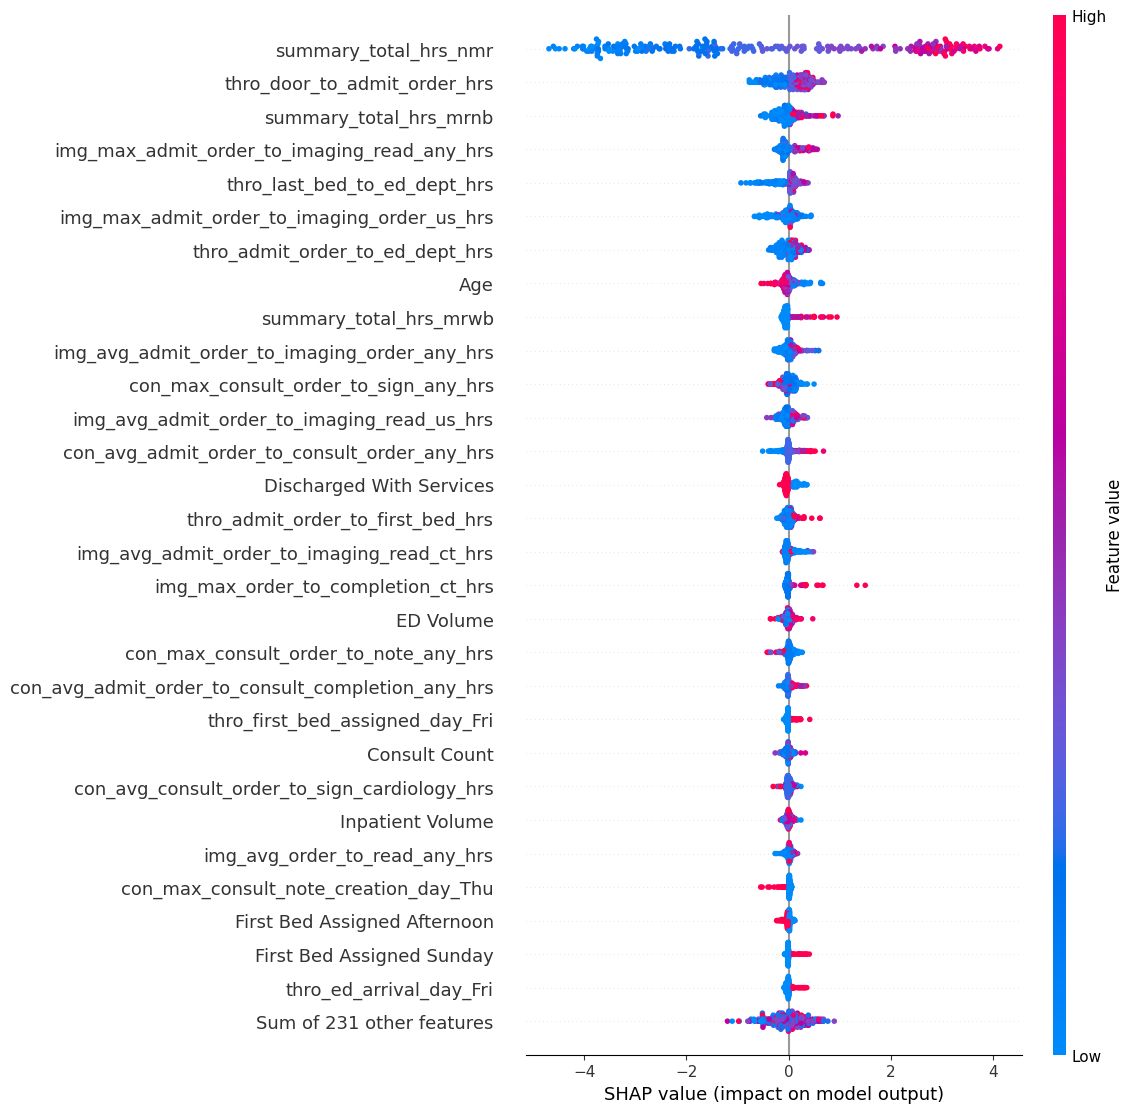

Plots for df_hf_continuous_2024-08-27 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [7]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_continuous_and_plot(df_filt, fp_continuous, output_folder, df_name, suffix="continuous")